### Bag of Words

This file contains the whole implementation of the conventional machine learning approach. 
The image data can be found here:

fruits: http://www.vicos.si/Downloads/FIDS30

cars: http://cogcomp.org/Data/Car/

The data should be loaded into the images folder, which should contain the FIDS30 folder and the CarData folder.

        Bag-of-Visual-Words/images/FIDS30
                                  /CarData

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split

### kmeans.py

In [2]:
"""
Using SKLearns API for performing Kmeans clustering.
Using sklearn.datasets.make_blobs for generating randomized gaussians
for clustering.

"""

import numpy as np 
from matplotlib import pyplot as plt 
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs 

# create a dataset sample space that will be used
# to test KMeans. Use function : make_blobs
# 

n_samples = 1000
n_features = 5;
n_clusters = 3;

# aint this sweet 
X, y = make_blobs(n_samples, n_features) 
# X => array of shape [nsamples,nfeatures] ;;; y => array of shape[nsamples]

# X : generated samples, y : integer labels for cluster membership of each sample
# 
# 

# performing KMeans clustering

ret =  KMeans(n_clusters = n_clusters).fit_predict(X)
print(ret)

__, ax = plt.subplots(2)
ax[0].scatter(X[:,0], X[:,1])
ax[0].set_title("Initial Scatter Distribution")
ax[1].scatter(X[:,0], X[:,1], c=ret)
ax[1].set_title("Colored Partition denoting Clusters")
# plt.scatter
plt.show()



[2 0 0 2 1 0 1 0 2 0 0 1 2 2 1 1 2 2 2 1 2 0 2 2 2 0 2 0 2 0 2 2 1 2 0 1 2
 0 0 2 0 0 2 2 1 2 1 1 2 1 2 1 1 0 1 0 1 1 0 1 0 1 1 0 1 1 0 0 1 2 1 1 0 2
 2 2 2 0 2 0 2 0 1 2 2 1 1 2 0 2 0 2 0 0 2 0 0 2 1 0 1 1 0 1 2 0 0 1 1 1 1
 1 2 0 2 2 0 1 1 0 1 1 1 1 1 2 1 0 2 2 1 0 1 2 1 1 2 0 1 1 2 1 2 1 2 1 1 1
 1 0 2 2 0 2 0 2 1 2 0 1 0 0 0 2 0 1 1 2 1 2 0 0 2 0 0 1 1 2 2 1 0 0 2 2 0
 1 2 0 2 1 1 2 0 0 2 2 2 1 0 1 2 0 1 1 0 1 0 0 2 2 0 2 2 1 1 0 2 0 1 0 1 0
 2 1 0 2 0 1 1 2 0 2 0 1 0 0 2 1 0 0 0 0 0 1 1 1 1 2 2 1 2 1 1 2 1 0 0 0 2
 0 2 2 2 2 0 2 2 2 1 0 1 2 1 0 1 1 2 0 2 0 1 0 0 2 0 1 2 1 0 1 1 0 0 0 2 0
 2 1 2 0 2 2 1 0 2 2 2 1 2 2 0 0 2 1 0 0 2 0 1 0 2 2 0 2 2 0 1 1 0 1 1 1 1
 2 0 1 2 2 0 0 0 0 2 1 2 1 0 1 2 0 1 0 2 0 2 2 1 0 1 0 1 0 2 0 0 2 2 2 2 0
 2 1 2 0 0 0 1 2 1 1 1 2 1 2 2 1 0 1 1 1 2 1 2 0 2 0 1 1 2 2 1 0 2 1 1 2 0
 1 2 0 1 2 1 1 0 0 2 1 0 2 2 0 0 1 1 1 1 0 2 1 0 2 0 0 2 2 2 0 1 0 1 1 2 2
 2 0 2 1 1 0 1 1 0 1 0 1 0 1 0 0 2 1 1 0 1 2 1 1 2 1 0 1 2 1 1 2 2 2 2 1 0
 2 0 2 2 2 2 2 0 2 2 0 2 

<Figure size 640x480 with 2 Axes>

### Bag.py

In [3]:
import cv2
import numpy as np 
from glob import glob 
import argparse
#from helpers import *
from matplotlib import pyplot as plt 


class BOV:
    def __init__(self, no_clusters):
        self.no_clusters = no_clusters
        self.train_path = None
        self.test_path = None
        self.im_helper = ImageHelpers()
        self.bov_helper = BOVHelpers(no_clusters)
        self.file_helper = FileHelpers()
        self.imageCount = 0
        self.trainImageCount = 0
        self.train_labels = np.array([])
        self.name_dict = {}
        self.descriptor_list = []
        
        self.path = None
        self.gray = 0
        
        self.train_images = []
        self.train_img_names = []
        self.train_cls = []
        
        self.test_images = []
        self.test_img_names = []
        self.test_cls = []      
        
        self.predictions = []
        self.actual_labels=[]
        self.predicted_labels=[]
        
    def dictionaryfy(self):
        train_dict = {}
        for i, image in enumerate(self.train_images):        
            cls = str(self.train_cls[i]).split('_')[0]
            if (cls not in train_dict):
                train_dict[cls] = []

            train_dict[cls].append(image)
        self.images = train_dict
        
        test_dict = {}
        for i, image in enumerate(self.test_images):        
            cls = str(self.test_cls[i]).split('_')[0]
            if (cls not in test_dict):
                test_dict[cls] = []

            test_dict[cls].append(image)
        self.testImages = test_dict
        
    
    def setCLF(self, clf):
        self.bov_helper.setCLF(clf)
    
    def extractFeatures(self):
        # extract SIFT Features from each image
        print("train image count: ", self.trainImageCount)
        print(self.path)
        
        label_count=0
        for word, imlist in self.images.items():
            #self.name_dict[str(label_count)] = word
            print("Computing Features for ", word)
            #print("List: ", imlist)
            for im in imlist:
                # cv2.imshow("im", im)
                # cv2.waitKey()
                self.train_labels = np.append(self.train_labels, self.name_dict[word])
                #plt.figure()
                #plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))
                
                kp, des = self.im_helper.features(im) #self.im_helper.gray(im)
                #featureV = self.im_helper.featuresPL(im)
                #print("featureV: ", featureV)
                #print("des: ", des)
                self.descriptor_list.append(des)

            label_count += 1
            
        #print(self.descriptor_list)
 
    def trainModel(self):
        """
        This method contains the entire module 
        required for training the bag of visual words model

        Use of helper functions will be extensive.

        """
        # perform clustering   
        bov_descriptor_stack = self.bov_helper.formatND(self.descriptor_list)
        print("Cluster")
        self.bov_helper.cluster()
        self.bov_helper.developVocabulary(n_images = self.trainImageCount, descriptor_list=self.descriptor_list)

        # show vocabulary trained
        self.bov_helper.plotHist()
 

        self.bov_helper.standardize()
        self.runCrossval()
        print("trainModel DONE.")

    def runCrossval(self):
        self.bov_helper.train(self.train_labels)
        
    def recognize(self,test_img, test_image_path=None):

        """ 
        This method recognizes a single image 
        It can be utilized individually as well.

        """

        kp, des = self.im_helper.features(test_img)
        #des = self.im_helper.featuresPL(im)
        # print kp
        #print(des.shape)

        # generate vocab for test image
        vocab = np.array( [[ 0 for i in range(self.no_clusters)]])
        # locate nearest clusters for each of 
        # the visual word (feature) present in the image
        
        # test_ret =<> return of kmeans nearest clusters for N features
        test_ret = self.bov_helper.kmeans_obj.predict(des)
        # print test_ret

        # print vocab
        for each in test_ret:
            vocab[0][each] += 1

        #print(vocab)
        # Scale the features
        vocab = self.bov_helper.scale.transform(vocab)

        # predict the class of the image
        lb = self.bov_helper.clf.predict(vocab)
        # print "Image belongs to class : ", self.name_dict[str(int(lb[0]))]
        return lb


    def getHistogramLabels(self):
        return self.bov_helper.getHistogramLabels()
        
    def testModel(self):
        """ 
        This method is to test the trained classifier

        read all images from testing path 
        use BOVHelpers.predict() function to obtain classes of each image

        """
        wordlist=[]
        #self.testImages, self.testImageCount = self.file_helper.getFiles(self.test_path)
        self.predictions = []
        self.actual_labels=[] 
        #self.testImages.sort()
        #correct_labels = []
        for word, imlist in self.testImages.items():
            print("processing " ,word)
            for im in imlist:
                self.actual_labels.append(self.name_dict[word])
                # print imlist[0].shape, imlist[1].shape
                #correct_labels.append(self.name_dict_reverse[word])
                #print(im.shape)
                cl = self.recognize(im)
                #print(cl)
                self.predictions.append({
                    'image':im,
                    'class':cl
                    #'object_name':self.name_dict[str(int(cl[0]))]
                    })

        #print(predictions)
        #print("CORRECT LABELS:",correct_labels)
        self.predicted_labels=[]
        for cl in self.predictions:
            self.predicted_labels.append(int(cl['class'][0]))
        
        
        #for cl in self.test_cls:
            #actual_labels.append(self.name_dict[cl])
        print("PREDICTED: ",self.predicted_labels)
        print("ACTUAL: ",self.actual_labels)
        
        prec=precision_score(self.actual_labels, self.predicted_labels,average='macro')
        acc=accuracy_score(self.actual_labels, self.predicted_labels)
        f1=f1_score(self.actual_labels, self.predicted_labels,average='macro')
        #for each in predictions:
            # cv2.imshow(each['object_name'], each['image'])
            # cv2.waitKey()
            # cv2.destroyWindow(each['object_name'])
            # 
            #plt.imshow(cv2.cvtColor(each['image'], cv2.COLOR_GRAY2RGB))
            #plt.title(each['object_name'])
            #plt.show()
        return [prec,acc,f1]


    def print_vars(self):
        pass
    
    def loadFruits(self, path):
        self.path = path
        
        # read file. prepare file lists.
        self.train_images, self.train_img_names = self.file_helper.get_fruit_images(self.path)
        self.train_cls = [name.split('_')[0] for name in self.train_img_names]
        
        l=next(os.walk(self.path))[1]
        label_count=0
        for word in l:
            self.name_dict[word]=label_count
            label_count=label_count+1
    
    def trainTestSplit(self):
        self.train_images, self.test_images, self.train_cls, self.test_cls = train_test_split(self.train_images, self.train_cls, test_size=0.2, random_state=9253, stratify=self.train_cls)
        self.trainImageCount = len(self.train_images)
        self.testImageCount = len(self.test_images)
    
    def loadCars(self, path):
        self.path = path
        
        self.train_images, self.train_img_names = self.file_helper.get_car_images(self.path)
        self.train_cls = ['neg' if name.startswith('neg') else 'pos' for name in self.train_img_names]
        self.trainImageCount = len(self.train_images)
        
        
        self.test_images, self.test_img_names = self.file_helper.get_car_images(self.path, 'TestImages')
        self.test_cls = ['neg' if name.startswith('neg') else 'pos' for name in self.test_img_names]
        self.testImageCount = len(self.test_images) 
        
        self.name_dict['neg']=0
        self.name_dict['pos']=1


### helper.py

In [4]:
import numpy as np 

from PIL import Image
import cv2

import requests
import zipfile
import tarfile
import io

import os
import glob

import gc

from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors.nearest_centroid import NearestCentroid
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_validate
from sklearn.neural_network import MLPClassifier

class ImageHelpers:
    def __init__(self):
        self.sift_object = cv2.xfeatures2d.SIFT_create()

    def gray(self, image):
        plt.figure()
        plt.imshow(image)
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        return gray

    def colorRGB(self, image):
        colorRGB = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        return colorRGB
    
    def features(self, image):
        keypoints, descriptors = self.sift_object.detectAndCompute(image, None)
        return [keypoints, descriptors]
    
    def featuresPL(self, image):
        im = Image.fromarray(image)
        featureVector = im.histogram()
        return featureVector


class BOVHelpers:
    def __init__(self, n_clusters = 20):
        self.n_clusters = n_clusters
        self.kmeans_obj = KMeans(n_clusters = n_clusters)
        self.kmeans_ret = None
        self.descriptor_vstack = None
        self.mega_histogram = None
        self.train_labels = None
        self.clf  = MLPClassifier(solver='lbfgs', alpha=0.001,hidden_layer_sizes=(100,), random_state=1)  
    
    def setCLF(self, clf):
        self.clf = clf 
    
    def getHistogramLabels(self):
        return [self.mega_histogram,self.train_labels]
    
    def cluster(self):
        """    
        cluster using KMeans algorithm

        """
        self.kmeans_ret = self.kmeans_obj.fit_predict(self.descriptor_vstack)

    def developVocabulary(self,n_images, descriptor_list, kmeans_ret = None):
        
        """
        Each cluster denotes a particular visual word 
        Every image can be represeted as a combination of multiple 
        visual words. The best method is to generate a sparse histogram
        that contains the frequency of occurence of each visual word 

        Thus the vocabulary comprises of a set of histograms of encompassing
        all descriptions for all images

        """

        self.mega_histogram = np.array([np.zeros(self.n_clusters) for i in range(n_images)])
        old_count = 0
        
        for i in range(n_images):
            l = len(descriptor_list[i])
            for j in range(l): 
                if kmeans_ret is None:
                    idx = self.kmeans_ret[old_count+j]
                else:
                    idx = kmeans_ret[old_count+j]
                self.mega_histogram[i][idx] += 1
            old_count += l
        print("Vocabulary Histogram Generated")

    def standardize(self, std=None):
        """
        
        standardize is required to normalize the distribution
        wrt sample size and features. If not normalized, the classifier may become
        biased due to steep variances.

        """
        if std is None:
            self.scale = StandardScaler().fit(self.mega_histogram)
            self.mega_histogram = self.scale.transform(self.mega_histogram)
        else:
            print("STD not none. External STD supplied")
            self.mega_histogram = std.transform(self.mega_histogram)

    def formatND(self, l):
        """    
        restructures list into vstack array of shape
        M samples x N features for sklearn

        """
        
        vStack = np.array(l[0])
        for remaining in l[1:]:
            vStack = np.vstack((vStack, remaining))
        self.descriptor_vstack = vStack.copy()
        return vStack

    def train(self, train_labels):
        """
        uses sklearn classifiers


        """
        #print("Training SVM")
        #print(self.clf)
        #print("Train labels", train_labels)
        #self.clf.fit(self.mega_histogram, train_labels)
        self.train_labels=train_labels
        self.clf.fit(self.mega_histogram, train_labels)
        names = ["Nearest Centroid", "Linear SVM","Decision Tree", "Naive Bayes","MLP"]
        classifiers = [NearestCentroid(metric="euclidean"),LinearSVC(dual=False),DecisionTreeClassifier(),GaussianNB(),MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(15,), random_state=1)]
        
        for name, clf in zip(names, classifiers):
            scoring = {'acc': 'accuracy','prec': 'precision_macro','rec': 'recall_macro'}
            scores = cross_validate(clf, self.mega_histogram, train_labels, cv=5, scoring=scoring,return_train_score=True)
            print(name," -- Training Set --", "Mean Accuracy", scores['train_acc'].mean())
            print(name," -- Test Set --", "Mean Accuracy", scores['test_acc'].mean())
            print(name," -- Training Set --", "Mean Precision", scores['train_prec'].mean())
            print(name," -- Test Set --", "Mean Precision", scores['test_prec'].mean())
            print(name," -- Training Set --", "Mean Recall", scores['train_rec'].mean())
            print(name," -- Test Set --", "Mean Recall", scores['test_rec'].mean())
        print("Training completed")

    def predict(self, iplist):
        predictions = self.clf.predict(iplist)
        return predictions

    def plotHist(self, vocabulary = None):
        print("Plotting histogram")
        if vocabulary is None:
            vocabulary = self.mega_histogram

        x_scalar = np.arange(self.n_clusters)
        y_scalar = np.array([abs(np.sum(vocabulary[:,h], dtype=np.int32)) for h in range(self.n_clusters)])

        print(y_scalar)

        plt.bar(x_scalar, y_scalar)
        plt.xlabel("Visual Word Index")
        plt.ylabel("Frequency")
        plt.title("Complete Vocabulary Generated")
        plt.xticks(x_scalar + 0.4, x_scalar)
        plt.show()

class FileHelpers:

    def __init__(self):
        pass
    
    def resize_images(self,images):
        """
        used to resize all images to the mean height/width
        note that this is prone to generating distorted images
        better results are expected with methods like pyramid pooling (https://arxiv.org/abs/1406.4729)
        """
        target_size = 200
        mean_shape = np.mean([[i.shape[0],i.shape[1]] for i in images], axis=0)
        max_v = max(mean_shape[0], mean_shape[1])
        # scale by preserving average ratio
        target_height = int(target_size * mean_shape[0]/max_v)
        target_width = int(target_size * mean_shape[1]/max_v)
        for i in range(len(images)):
            images[i] = np.array(Image.fromarray(images[i]).resize((target_width, target_height), Image.ANTIALIAS))
            print("Resized {} fruit images".format(i), end="\r")

        return images
    
    def get_car_images(self, car_data_path, folder = 'TrainImages'):
        """
        - reads all pgm files
        - returns a list of all images and their names

        """
        p = os.path.join(car_data_path,folder,'*.pgm')
        files = glob.glob(p)
        print("Found {} car files".format(len(files)-1))
        images = []
        image_names = []

        for filename in files:
            image_names.append(os.path.basename(filename))
            
            fn = filename.replace("\\", "/")
            fn = fn.split("/")[-1]
            if fn == 'neg-130.pgm':
                print('File neg-130.pgm does not yield features')
                continue
            with Image.open(filename) as img:
                images.append(np.array(img))

        return np.array(images), image_names

    def get_fruit_images(self, fruits_data_path):
        """
        - reads all jpg files and converts them to 3-channel JPEG if they have a different format.
        - scales all the images
        - returns a list of all converted and scaled images and their names

        """
        images = []
        image_names = []
        cnt=0

        for dirpath, dirnames, filenames in os.walk(fruits_data_path):
            for filename in [f for f in filenames if f.endswith(".jpg")]:
                cnt = cnt+1
                with Image.open(os.path.join(dirpath,filename)) as img:
                    if img.format != "JPEG":
                        # we only want 3 channels
                        img = img.convert("RGB")
                    np_img = np.array(img)
                    if len(np_img.shape) != 3 or np_img.shape[2] != 3:
                        # incorrectly imported/converted RGB file
                        continue
                    images.append(np_img)
                    image_names.append(os.path.split(dirpath)[-1] + "_" + filename)
                    print("Found {} fruit files".format(len(image_names)), end="\r")
        
        
        images = np.stack(self.resize_images(images), axis=0)

        return images, image_names
    
    def getFiles(self, path):
        """
        - returns  a dictionary of all files 
        having key => value as  objectname => image path

        - returns total number of files.

        """
        imlist = {}
        count = 0
        for each in glob(path + "*"):
            each = each.replace("\\", "/")
            word = each.split("/")[-1]
            print(" #### Reading image category ", word, " ##### ")
            imlist[word] = []
            for imagefile in glob(path+word+"/*"):
                imagefile = imagefile.replace("\\", "/")
                print("Reading file ", imagefile)
                
                
                im = Image.open(imagefile)
                if (im.format != "JPEG"):
                    im = im.convert("RGB")
                np_im = np.array(im)
                if len(np_im.shape) != 3 or np_im.shape[2] != 3:
                    # incorrectly imported/converted RGB file
                    continue
                
                imlist[word].append(np_im)
                count +=1 

        return [imlist, count]



### Load images

The paths to the folders is handed to the load methods as a parameter and can be adjusted to the right path.
However it should suffice to load the FIDS30 and CarData folder into the images folder of the Bag-of-words project as noted at the top of the notebook.

In [26]:
cars = BOV(no_clusters=100)
cars.loadCars("./images/CarData/")
fruits = BOV(no_clusters=100)
fruits.loadFruits("./images/FIDS30/")

Found 1049 car files
File neg-130.pgm does not yield features
Found 169 car files


After the images are loaded, we check if the import worked accordingly.

Text(0.5,1,'Colour Histogram, using PIL')

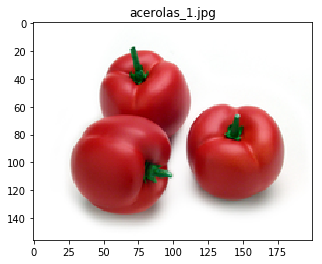

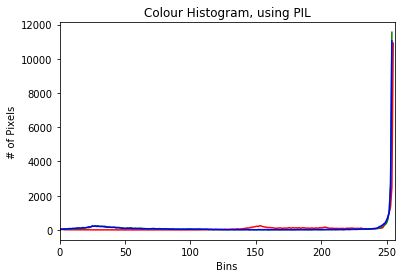

In [6]:
im = Image.fromarray(fruits.train_images[0])
plt.imshow(im)
plt.title(fruits.train_img_names[0])

featureVector = im.histogram()

plt.figure()
plt.plot(featureVector[:256], 'r')
plt.plot(featureVector[257:512], 'g')
plt.plot(featureVector[513:], 'b')
plt.xlim([0, 256])
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
plt.title("Colour Histogram, using PIL")

### Train/test split

Since the fruit data set does not have a predefined train and test split, we had to do it manually. We also ensured, that the deep learning approach has the exact same train and test split as the conventional model.

In [7]:
print("{} unique classes for cars".format(len(set(cars.train_cls))))
print("{} unique classes for fruits".format(len(set(fruits.train_cls))))

fruits.trainTestSplit()

2 unique classes for cars
30 unique classes for fruits


To make things easier, we saved all the images into a dictionary with the fruit names as key and the images in form of a list as the value

Text(0.5,1,'watermelons')

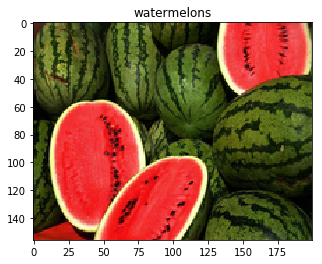

In [8]:
cars.dictionaryfy()
fruits.dictionaryfy()
im = Image.fromarray(fruits.images['watermelons'][0])
plt.imshow(im)
plt.title('watermelons')

### Fruits

In [9]:
%time fruits.extractFeatures()

train image count:  774
../../ex3/FIDS30/
Computing Features for  pomegranates
Computing Features for  mangos
Computing Features for  apples
Computing Features for  cherries
Computing Features for  cantaloupes
Computing Features for  olives
Computing Features for  grapes
Computing Features for  peaches
Computing Features for  passionfruit
Computing Features for  tomatoes
Computing Features for  guava
Computing Features for  pineapples
Computing Features for  strawberries
Computing Features for  oranges
Computing Features for  bananas
Computing Features for  watermelons
Computing Features for  blueberries
Computing Features for  avocados
Computing Features for  limes
Computing Features for  acerolas
Computing Features for  grapefruits
Computing Features for  coconuts
Computing Features for  apricots
Computing Features for  raspberries
Computing Features for  figs
Computing Features for  kiwifruit
Computing Features for  blackberries
Computing Features for  pears
Computing Features for  

Cluster
Vocabulary Histogram Generated
Plotting histogram
[1173 1424 1255 1713 1707 1861 1473 1482 1394 1990 1256 1537 1229 1508
 2430 1304 1136 2257 1555 1263 1310 1729 2165 1670 1394 1552 1477 1761
 1643 1555 1261 1207 1419 1792 1343 1134 1543 1613 1719 1413 1218 1234
 1445 1170 1237 1394 1386 1330 1434 2544 1121 1085 1417 2571 1630 1406
 1297 1348 1405 1470 1163 1530 1410 1349 1506 1203 1529 1653 1530 1902
 1214 1243 1525 2650 1232 1532 1618 1445 1449 1341 1304 1722 1642 1242
 1553 1476 1445 2193 1504 1404 1807 1553 2033 1362 1559 1730 1525 1955
 1733 1234]


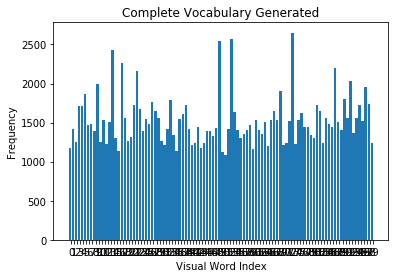

D:\Program_Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Program_Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Program_Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Nearest Centroid  -- Training Set -- Mean Accuracy 0.44230528454830254
Nearest Centroid  -- Test Set -- Mean Accuracy 0.30650319767096645
Nearest Centroid  -- Training Set -- Mean Precision 0.4947159835101205
Nearest Centroid  -- Test Set -- Mean Precision 0.3379855680381996
Nearest Centroid  -- Training Set -- Mean Recall 0.44276855597639103
Nearest Centroid  -- Test Set -- Mean Recall 0.3026190476190476
Linear SVM  -- Training Set -- Mean Accuracy 0.9861188027549581
Linear SVM  -- Test Set -- Mean Accuracy 0.23280241818578928
Linear SVM  -- Training Set -- Mean Precision 0.9876261843955969
Linear SVM  -- Test Set -- Mean Precision 0.2608793243793244
Linear SVM  -- Training Set -- Mean Recall 0.9869589394495625
Linear SVM  -- Test Set -- Mean Recall 0.2242777777777778


D:\Program_Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Program_Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Program_Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Decision Tree  -- Training Set -- Mean Accuracy 1.0
Decision Tree  -- Test Set -- Mean Accuracy 0.16263327511358486
Decision Tree  -- Training Set -- Mean Precision 1.0
Decision Tree  -- Test Set -- Mean Precision 0.16071596921596926
Decision Tree  -- Training Set -- Mean Recall 1.0
Decision Tree  -- Test Set -- Mean Recall 0.15957936507936507


D:\Program_Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Program_Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Program_Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Naive Bayes  -- Training Set -- Mean Accuracy 0.4911829706681723
Naive Bayes  -- Test Set -- Mean Accuracy 0.27392059361784715
Naive Bayes  -- Training Set -- Mean Precision 0.5498975820534397
Naive Bayes  -- Test Set -- Mean Precision 0.26765944645484285
Naive Bayes  -- Training Set -- Mean Recall 0.4930227562847331
Naive Bayes  -- Test Set -- Mean Recall 0.26438888888888884
MLP  -- Training Set -- Mean Accuracy 1.0
MLP  -- Test Set -- Mean Accuracy 0.27675841072875473
MLP  -- Training Set -- Mean Precision 1.0
MLP  -- Test Set -- Mean Precision 0.2895617160617161
MLP  -- Training Set -- Mean Recall 1.0
MLP  -- Test Set -- Mean Recall 0.2687460317460318
Training completed
trainModel DONE.
Wall time: 20min 9s


D:\Program_Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Program_Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [10]:
%time fruits.trainModel()

#### Hypertuning

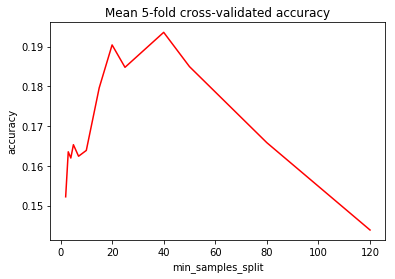

In [11]:
def hypertuneDT(bov, figname='fruits_dt'):
    histogramLabels = bov.getHistogramLabels()
    min_samples_splits = [2,3,4,5,7,10,15,20,25,40,50,80,120]
    results = []
    for min_samples_split in min_samples_splits:
        clf = DecisionTreeClassifier(min_samples_split=min_samples_split)
        scores = cross_validate(clf, histogramLabels[0], histogramLabels[1], cv=5)
        results.append(scores['test_score'].mean())

    plt.plot(min_samples_splits, results, "r", label="Test Accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("min_samples_split")
    plt.title("Mean 5-fold cross-validated accuracy")
    plt.savefig(figname, bbox_inches='tight')    
    plt.show()

    

hypertuneDT(fruits)

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.svm import LinearSVC
import pandas as pd

def hypertuneSVC(bov, figname='fruits_svc'):
    histogramLabels = bov.getHistogramLabels()
    C = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100,1000]
    results = []
    for idx, c in enumerate(C):
        print(idx, "---", c)
        clf=LinearSVC(C=c, loss='squared_hinge', max_iter=100000, multi_class='ovr', penalty='l2', random_state=0, tol=1e-05, verbose=0)
        scores = cross_validate(clf,  histogramLabels[0], histogramLabels[1], cv=5)['test_score']
        print(scores.mean())
        for score in scores:
            results.append({'score': score, 'x':idx, 'penalty':c})

    df_trace = pd.DataFrame.from_dict(results)
    g = sns.relplot(x="x", y="score", kind="line", data=df_trace)
    plt.xticks(range(len(C)), C, rotation='vertical')
    plt.xlabel("Penalty parameter C")
    plt.title("5-fold CV Accuracy scores by Penalty parameter C")
    axes = plt.gca()
    #axes.set_ylim([0.0,0.65])
    axes.set_xlim([0,len(C)])
    plt.savefig('scaled_amz_C_eval.pdf')
    plt.savefig(figname, bbox_inches='tight')    
    plt.show()


#hypertuneSVC(fruits)

In [13]:
def hypertuneMLPlayers(bov, figname='fruits_mlplayers'):
    histogramLabels = bov.getHistogramLabels()
    layers = [2,5,10,20,30,40,50,60,70,80,100,150]
    results = []
    for l in layers:
        clf = MLPClassifier(solver='lbfgs', alpha=1,hidden_layer_sizes=(l,), random_state=1)
        scoring = {'acc': 'accuracy','prec': 'precision_macro','rec': 'recall_macro'}
        scores = cross_validate(clf, histogramLabels[0], histogramLabels[1], cv=5, scoring=scoring,return_train_score=True)
        print("Train Set --", "Mean Accuracy ", scores['train_acc'].mean())
        print("Test  Set --", "Mean Accuracy ", scores['test_acc'].mean())
        print("Train Set --", "Mean Precision", scores['train_prec'].mean())
        print("Test  Set --", "Mean Precision", scores['test_prec'].mean())
        print("Train Set --", "Mean Recall   ", scores['train_rec'].mean())
        print("Test  Set --", "Mean Recall   ", scores['test_rec'].mean())
        results.append(scores['test_acc'].mean())

    plt.plot(layers, results, "r", label="Test Accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("Hidden Layers")
    plt.title("Mean 5-fold cross-validated accuracy")
    plt.savefig(figname, bbox_inches='tight')
    plt.show()
    
#hypertuneMLPlayers(fruits)

In [14]:
def hypertuneMLPalphas(bov, layers=100, figname='fruits_mlpalphas'):
    histogramLabels = bov.getHistogramLabels()
    alphas = [0.0001,0.001,0.01,0.1,1,10,100]
    results = []
    for a in alphas:
        clf = MLPClassifier(solver='lbfgs', alpha=a,hidden_layer_sizes=(layers,), random_state=1)
        scoring = {'acc': 'accuracy','prec': 'precision_macro','rec': 'recall_macro'}
        scores = cross_validate(clf, histogramLabels[0], histogramLabels[1], cv=5, scoring=scoring,return_train_score=True)
        print("Train Set --", "Mean Accuracy ", scores['train_acc'].mean())
        print("Test  Set --", "Mean Accuracy ", scores['test_acc'].mean())
        print("Train Set --", "Mean Precision", scores['train_prec'].mean())
        print("Test  Set --", "Mean Precision", scores['test_prec'].mean())
        print("Train Set --", "Mean Recall   ", scores['train_rec'].mean())
        print("Test  Set --", "Mean Recall   ", scores['test_rec'].mean())
        results.append(scores['test_acc'].mean())

    plt.plot(alphas, results, "r", label="Test Accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("Alpha")
    plt.title("Mean 5-fold cross-validated accuracy")
    plt.savefig(figname, bbox_inches='tight')
    plt.show()
    
#hypertuneMLPalphas(fruits)

#### Results on the TEST set

In [15]:
%time ret=fruits.testModel()
print(ret)

processing  guava
processing  cantaloupes
processing  tomatoes


D:\Program_Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Program_Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Program_Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Program_Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Program_Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was

processing  blueberries
processing  apples


D:\Program_Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Program_Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Program_Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Program_Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Program_Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was

processing  bananas
processing  grapefruits
processing  pomegranates


D:\Program_Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Program_Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Program_Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Program_Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Program_Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was

processing  figs
processing  oranges
processing  pineapples


D:\Program_Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Program_Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Program_Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Program_Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Program_Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was

processing  cherries
processing  avocados
processing  olives


D:\Program_Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Program_Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Program_Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Program_Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Program_Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was

processing  acerolas
processing  passionfruit
processing  limes


D:\Program_Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Program_Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Program_Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Program_Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Program_Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was

processing  pears
processing  lemons
processing  strawberries


D:\Program_Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Program_Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Program_Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Program_Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Program_Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was

processing  mangos
processing  plums
processing  blackberries


D:\Program_Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Program_Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Program_Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Program_Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Program_Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was

processing  raspberries
processing  grapes


D:\Program_Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Program_Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Program_Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Program_Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Program_Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was

processing  watermelons
processing  coconuts
processing  apricots
processing  peaches
processing  kiwifruit
PREDICTED:  [22, 13, 13, 13, 4, 7, 4, 3, 22, 2, 3, 7, 17, 28, 18, 8, 13, 7, 1, 18, 0, 12, 2, 0, 17, 12, 5, 29, 16, 8, 3, 20, 17, 15, 28, 22, 17, 17, 24, 4, 1, 17, 4, 4, 11, 19, 17, 11, 11, 15, 25, 14, 8, 11, 1, 0, 4, 10, 21, 16, 21, 15, 19, 16, 11, 19, 15, 1, 23, 23, 23, 27, 23, 23, 23, 8, 0, 28, 8, 17, 8, 22, 9, 2, 21, 16, 19, 1, 1, 15, 8, 24, 18, 6, 0, 25, 20, 26, 20, 29, 16, 10, 22, 16, 16, 16, 16, 12, 22, 1, 4, 22, 3, 3, 15, 19, 19, 4, 12, 11, 28, 28, 0, 27, 27, 27, 28, 23, 19, 17, 13, 17, 6, 19, 4, 24, 0, 24, 28, 17, 25, 26, 0, 5, 5, 5, 0, 5, 5, 26, 26, 2, 11, 26, 6, 26, 11, 18, 21, 12, 12, 18, 0, 12, 12, 13, 6, 19, 20, 23, 15, 9, 9, 9, 9, 19, 15, 22, 22, 19, 29, 2, 28, 17, 16, 16, 1, 14, 14, 1, 6, 14, 14, 17]
ACTUAL:  [13, 13, 13, 13, 13, 13, 13, 7, 7, 7, 7, 7, 7, 28, 28, 28, 28, 28, 28, 28, 28, 28, 6, 6, 6, 6, 6, 6, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4, 4, 4, 11, 11, 1

D:\Program_Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Program_Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Program_Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Program_Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Program_Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was

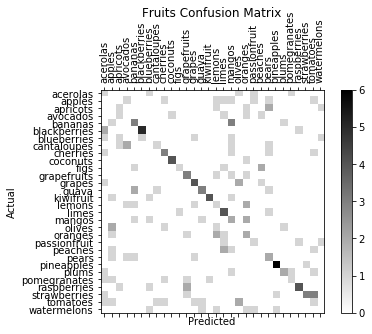

In [16]:
def plot_confusion_matrix(y_actual, y_pred, categories, title='Confusion matrix', cmap=plt.cm.binary, size=(6,4)):
    s_actual = pd.Categorical(y_actual, categories=categories)
    s_pred = pd.Categorical(y_pred, categories=categories)
    df_confusion = pd.crosstab(s_actual, s_pred, dropna=False)
    #print(df_confusion)
    plt.figure(figsize=size)
    plt.matshow(df_confusion, cmap=cmap, fignum=1)
    plt.title(title, y=1.3)
    plt.colorbar()
    tick_marks = np.arange(len(df_confusion.columns))
    plt.xticks(tick_marks, df_confusion.columns, rotation=90)
    plt.yticks(tick_marks, df_confusion.index)
    plt.ylabel("Actual")
    plt.xlabel("Predicted")
    plt.savefig(title, bbox_inches='tight')

    
categories = sorted(list(fruits.testImages.keys()))
y_a = []
y_p = []
for c in fruits.actual_labels:
    y_a.append(categories[c])
for c in fruits.predicted_labels:
    y_p.append(categories[c])

plot_confusion_matrix(y_a, y_p, categories, 'Fruits Confusion Matrix')

### Cars

In [17]:
# TEMPORARY!!
#cars = BOV(no_clusters=100)
#cars.loadCars("../../../ex3/CarData/")
#cars.dictionaryfy()

In [18]:
%time cars.extractFeatures()

train image count:  1049
../../ex3/CarData/
Computing Features for  neg
Computing Features for  pos
Wall time: 3.29 s


The best performing hypertuned classifier is set manually to later perform on the test data.

Cluster
Vocabulary Histogram Generated
Plotting histogram
[588 486 507 556 497 482 468 463 542 539 497 502 933 586 481 546 510 527
 471 637 488 635 421 472 490 578 579 672 684 513 806 430 552 423 826 650
 426 495 541 495 424 552 612 552 749 442 409 472 664 515 527 548 510 548
 626 577 530 573 526 407 702 491 535 454 617 516 397 436 618 665 538 477
 464 481 470 523 512 446 546 363 591 574 568 626 477 466 605 546 564 586
 494 478 487 590 376 488 755 561 488 709]


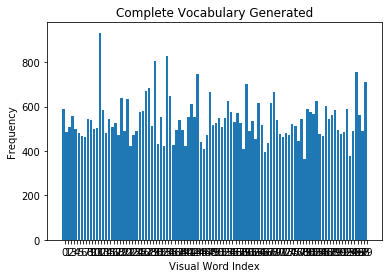

Nearest Centroid  -- Training Set -- Mean Accuracy 0.8717807480560757
Nearest Centroid  -- Test Set -- Mean Accuracy 0.8541307814992025
Nearest Centroid  -- Training Set -- Mean Precision 0.8716149761206602
Nearest Centroid  -- Test Set -- Mean Precision 0.8552201114467886
Nearest Centroid  -- Training Set -- Mean Recall 0.8722388693311245
Nearest Centroid  -- Test Set -- Mean Recall 0.8544862385321101
Linear SVM  -- Training Set -- Mean Accuracy 0.9392266870991544
Linear SVM  -- Test Set -- Mean Accuracy 0.8503349282296652
Linear SVM  -- Training Set -- Mean Precision 0.9389455663083549
Linear SVM  -- Test Set -- Mean Precision 0.8509527869545176
Linear SVM  -- Training Set -- Mean Recall 0.9396181404017394
Linear SVM  -- Test Set -- Mean Recall 0.8507839866555462
Decision Tree  -- Training Set -- Mean Accuracy 1.0
Decision Tree  -- Test Set -- Mean Accuracy 0.8017133743449533
Decision Tree  -- Training Set -- Mean Precision 1.0
Decision Tree  -- Test Set -- Mean Precision 0.803192808

In [19]:
cars.setCLF(MLPClassifier(solver='lbfgs', alpha=100,hidden_layer_sizes=(40,), random_state=1))
%time cars.trainModel()

#### Hypertuning

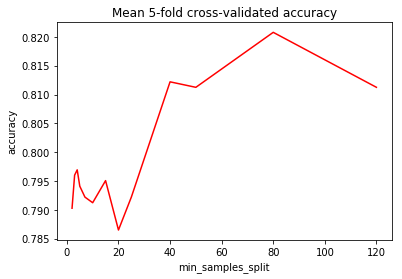

In [20]:
hypertuneDT(cars, 'cars_dt')

0 --- 1e-05
0.8579403053087263
1 --- 0.0001
0.8741626794258373
2 --- 0.001
0.8875051264524949
3 --- 0.01
0.8674868990658464
4 --- 0.1
0.8493825472772842
5 --- 1
0.8503349282296652
6 --- 10
0.8522396901344271
7 --- 100


D:\Program_Files\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Program_Files\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Program_Files\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Program_Files\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Program_Files\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iter

0.8474732285258602
8 --- 1000


D:\Program_Files\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Program_Files\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Program_Files\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Program_Files\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Program_Files\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iter

0.8436819321029848


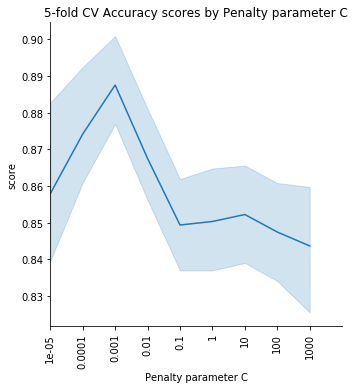

In [21]:
hypertuneSVC(cars, 'cars_svc')

Train Set -- Mean Accuracy  0.9823644928770078
Test  Set -- Mean Accuracy  0.8274823422191844
Train Set -- Mean Precision 0.9821638922064204
Test  Set -- Mean Precision 0.8277142438881103
Train Set -- Mean Recall    0.9831517912611305
Test  Set -- Mean Recall    0.8276680567139282
Train Set -- Mean Accuracy  0.9969024916283559
Test  Set -- Mean Accuracy  0.8617726133515606
Train Set -- Mean Precision 0.9969581958942033
Test  Set -- Mean Precision 0.8622902764909787
Train Set -- Mean Recall    0.9968610478359909
Test  Set -- Mean Recall    0.86242035029191
Train Set -- Mean Accuracy  1.0
Test  Set -- Mean Accuracy  0.8627249943039417
Train Set -- Mean Precision 1.0
Test  Set -- Mean Precision 0.8632935225221574
Train Set -- Mean Recall    1.0
Test  Set -- Mean Recall    0.8634286905754796
Train Set -- Mean Accuracy  1.0
Test  Set -- Mean Accuracy  0.8674960127591707
Train Set -- Mean Precision 1.0
Test  Set -- Mean Precision 0.8679983853601179
Train Set -- Mean Recall    1.0
Test  Set -

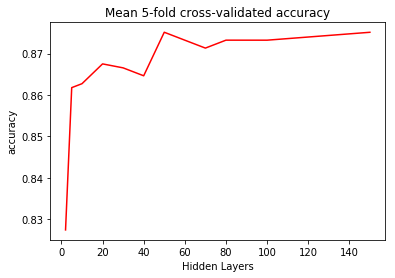

In [22]:
hypertuneMLPlayers(cars, 'cars_mlplayers')

Train Set -- Mean Accuracy  1.0
Test  Set -- Mean Accuracy  0.8589063568010937
Train Set -- Mean Precision 1.0
Test  Set -- Mean Precision 0.8588721617527193
Train Set -- Mean Recall    1.0
Test  Set -- Mean Recall    0.8589658048373645
Train Set -- Mean Accuracy  1.0
Test  Set -- Mean Accuracy  0.8589063568010937
Train Set -- Mean Precision 1.0
Test  Set -- Mean Precision 0.8588721617527193
Train Set -- Mean Recall    1.0
Test  Set -- Mean Recall    0.8589658048373645
Train Set -- Mean Accuracy  1.0
Test  Set -- Mean Accuracy  0.8579539758487128
Train Set -- Mean Precision 1.0
Test  Set -- Mean Precision 0.8580069308691346
Train Set -- Mean Recall    1.0
Test  Set -- Mean Recall    0.8580567139282735
Train Set -- Mean Accuracy  1.0
Test  Set -- Mean Accuracy  0.8598541809068125
Train Set -- Mean Precision 1.0
Test  Set -- Mean Precision 0.8597060796420326
Train Set -- Mean Recall    1.0
Test  Set -- Mean Recall    0.8597756463719766
Train Set -- Mean Accuracy  1.0
Test  Set -- Mean Ac

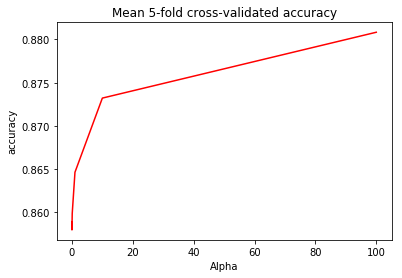

In [23]:
hypertuneMLPalphas(cars,40, 'cars_mlpalphas')

#### Final results on TEST data

In [24]:
%time ret=cars.testModel()
print(ret)

processing  pos


D:\Program_Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Program_Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Program_Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Program_Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Program_Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was

D:\Program_Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Program_Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Program_Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Program_Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Program_Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was

D:\Program_Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Program_Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Program_Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Program_Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Program_Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was

D:\Program_Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Program_Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Program_Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Program_Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Program_Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was

PREDICTED:  [1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1]
ACTUAL:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

D:\Program_Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Program_Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Program_Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Program_Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Program_Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was

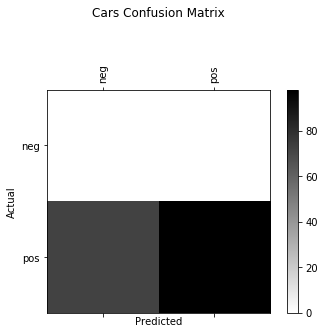

In [25]:
categories = sorted(['neg','pos'])
y_a = []
y_p = []

for c in cars.actual_labels:
    y_a.append(categories[c])
for c in cars.predicted_labels:
    y_p.append(categories[c])
    
plot_confusion_matrix(y_a, y_p, categories, 'Cars Confusion Matrix')